### Imports section

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Loading the dataset

In [2]:
# Using pandas ro load the dataset remotely
df = pd.read_csv("https://raw.githubusercontent.com/yqian000/OnlineReviewDetection/main/reviews.csv")

### Explore the dataset

In [3]:
df.head(10)

,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...
5,Home_and_Kitchen_5,3.0,CG,I WANTED DIFFERENT FLAVORS BUT THEY ARE NOT.
6,Home_and_Kitchen_5,5.0,CG,They are the perfect touch for me and the only...
7,Home_and_Kitchen_5,3.0,CG,These done fit well and look great. I love th...
8,Home_and_Kitchen_5,5.0,CG,"Great big numbers & easy to read, the only thi..."
9,Home_and_Kitchen_5,5.0,CG,My son loves this comforter and it is very wel...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40432 entries, 0 to 40431
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   category  40432 non-null  object 
 1   rating    40432 non-null  float64
 2   label     40432 non-null  object 
 3   text_     40432 non-null  object 
dtypes: float64(1), object(3)
memory usage: 1.2+ MB


In [5]:
df.isna().any()

category    False
rating      False
label       False
text_       False
dtype: bool

In [6]:
df.groupby("label").label.count()

label
CG    20216
OR    20216
Name: label, dtype: int64

### Univariate plots   
#### category plot

In [7]:
category_groups = df.groupby("category").category.count()
category_groups

category
Books_5                         4370
Clothing_Shoes_and_Jewelry_5    3848
Electronics_5                   3988
Home_and_Kitchen_5              4056
Kindle_Store_5                  4730
Movies_and_TV_5                 3588
Pet_Supplies_5                  4254
Sports_and_Outdoors_5           3946
Tools_and_Home_Improvement_5    3858
Toys_and_Games_5                3794
Name: category, dtype: int64

In [8]:
category_index = category_groups.index
category_count = category_groups.values

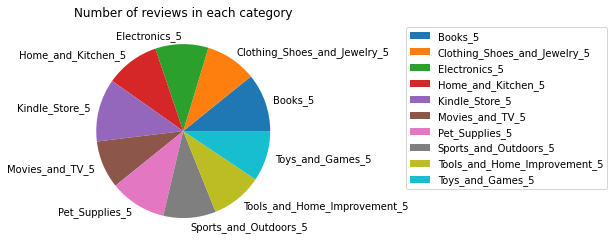

In [9]:
wedges,texts=plt.pie(category_count, labels = category_index)
plt.legend(wedges, category_index, bbox_to_anchor =(1.5, 0, 0, 1))
plt.title("Number of reviews in each category")
plt.show()

#### rating plot

In [10]:
df['rating'].describe()

count    40432.000000
mean         4.256579
std          1.144354
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: rating, dtype: float64

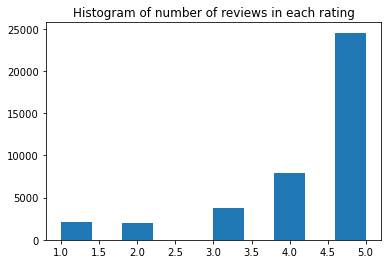

In [11]:
plt.title('Histogram of number of reviews in each rating')
plt.hist(df['rating'])
plt.show()

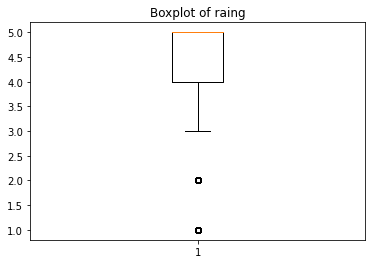

In [12]:
plt.title('Boxplot of raing')
plt.boxplot(df['rating'])
plt.show()

#### correlations between variables

In [13]:
# convert label to integers: CG = spam = 1, OR = not_spam = 0
df['y'] = (df['label'] == 'CG').apply(int)

In [25]:
#plt.scatter(df['rating'], df['y'])

In [16]:
df.groupby(['category', 'rating']).mean()


y
category                     rating          
Books_5                      1.0     0.538922
                             2.0     0.559091
                             3.0     0.523909
                             4.0     0.487073
                             5.0     0.492702
Clothing_Shoes_and_Jewelry_5 1.0     0.522388
                             2.0     0.461224
                             3.0     0.488834
                             4.0     0.496420
                             5.0     0.505784
Electronics_5                1.0     0.492163
                             2.0     0.470588
                             3.0     0.492669
                             4.0     0.497333
                             5.0     0.505476
Home_and_Kitchen_5           1.0     0.496350
                             2.0     0.509901
                             3.0     0.513353
                             4.0     0.460972
                             5.0     0.508190
Kindle_Store_5               1.0     0.530000
                             2.0     0.503268
                             3.0     0.527964
                             4.0     0.504967
                             5.0     0.492204
Movies_and_TV_5              1.0     0.473684
                             2.0     0.486111
                             3.0     0.513228
                             4.0     0.472973
                             5.0     0.511846
Pet_Supplies_5               1.0     0.483221
                             2.0     0.495690
                             3.0     0.513784
                             4.0     0.495562
                             5.0     0.501321
Sports_and_Outdoors_5        1.0     0.458763
                             2.0     0.453488
                             3.0     0.542169
                             4.0     0.500000
                             5.0     0.500797
Tools_and_Home_Improvement_5 1.0     0.523148
                             2.0     0.429379
                             3.0     0.521311
                             4.0     0.504464
                             5.0     0.499196
Toys_and_Games_5             1.0     0.430380
                             2.0     0.520548
                             3.0     0.517906
                             4.0     0.493525
                             5.0     0.502467

### Reviews length

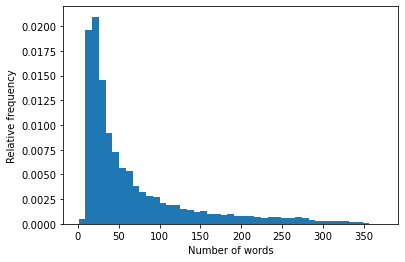

In [17]:
reviews_length_list = [len(i.split()) for i in df.text_]   #number of words in each review

plt.hist(reviews_length_list, density = True, bins = 45, )
plt.xlabel("Number of words")
plt.ylabel("Relative frequency")
plt.show()

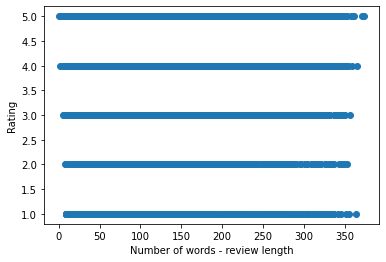

In [24]:
'''Q : Does review length correlate with its rating?'''  
'''A : No correlation'''
plt.scatter( reviews_length_list, df.rating)
plt.xlabel("Number of words - review length")
plt.ylabel("Rating")
plt.show()

### Basic sentiment analysis of data 

Most of reviews are somewhat on the positive side. 

In [19]:
'''Some sentiment analysis'''
#sentiment polarity has values ranging from -1 to 1. +1 and -1 means 
# most positive and most negative respectively. 

from textblob import TextBlob

sentiment_list = []

for i in range (len(df)):
    conv = TextBlob(df.text_[i])
    sentiment_list.append(conv.sentiment.polarity)

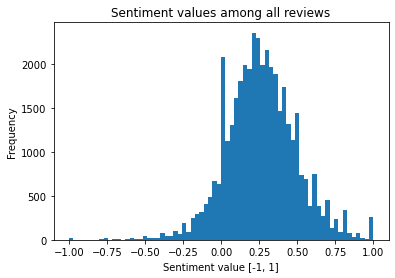

In [20]:
plt.hist(sentiment_list, bins = 70)
plt.title("Sentiment values among all reviews")
plt.xlabel("Sentiment value [-1, 1]")
plt.ylabel("Frequency")
plt.show()

### Explore data using k-means 

inspired by https://www.youtube.com/watch?v=ORpDAUQUnkU&t=859s

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

'''Preprocessing using tf-idf'''
vectorizer = TfidfVectorizer(stop_words='english')
features = vectorizer.fit_transform(df.text_)

'''k-means'''
k = 20
model = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1)
model.fit(features)

df['cluster'] = model.labels_      #append column to df 


print("Cluster centroids: \n")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

for i in range(k):
    print("Cluster", i)
    for j in order_centroids[i, :15]: #print out 10 feature terms of each cluster
        print (terms[j], end = " ")
    print('\n------------\n')

Cluster centroids: 

Cluster 0
story characters developed book written told read good author liked plot enjoyed great believable series 
------------

Cluster 1
great works product price bought little good used happy recommend small nice use love easy 
------------

Cluster 2
nice little bought good material fit small looks great like price bag just love really 
------------

Cluster 3
like just good great little really time bought work used don small ve old does 
------------

Cluster 4
reason gave stars plastic small good parts cover comfortable quality bit great just materials little 
------------

Cluster 5
book read characters story enjoyed series author good reading recommend loved great books written forward 
------------

Cluster 6
hard kind problem plastic little dog want cat great bought friend toy really nice harness 
------------

Cluster 7
book read story series books characters reading author good great just enjoyed loved interesting really 
------------

Cluster 8
screw 

#### k-means on all products seem to group texts by product categories. But we want to know any keywords that can be used to detect CG/OR reviews.

#### Next step is to pick a product category (e.g. book), then run k-means on that category to observe any outstanding words.

In [22]:
category = "Books_5"

#------------------------------------------------------------------------------------

'''Preprocessing using tf-idf'''
vectorizer = TfidfVectorizer(stop_words='english')
features = vectorizer.fit_transform(df.loc[df['category'] == category].text_)

'''k-means'''
k = 2
model = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1)
model.fit(features)


print("Cluster centroids: \n")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

for i in range(k):
    print("Cluster", i)
    for j in order_centroids[i, :15]: #print out 10 feature terms of each cluster
        print (terms[j], end = " ")
    print('\n------------\n')

Cluster centroids: 

Cluster 0
book read characters good story great series love recommend developed enjoyed books loved written reading 
------------

Cluster 1
book read story good just love great books characters like reading series author interesting time 
------------



### Word clouds

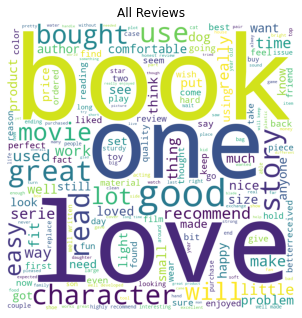

In [50]:
'''For all reviews'''

from wordcloud import WordCloud, STOPWORDS

accu = ""
stopwords = set(STOPWORDS)

for review in df.text_:
    tokens = review.split()    #split sentence str into individual words
    
    for i in range (len(tokens)):      #lowercasing 
        tokens[i] = tokens[i].lower()
    accu += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stopwords,
                min_font_size = 10).generate(accu)
 
# plot the WordCloud image                      
plt.figure(figsize = (4, 4), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title("All Reviews")
 
plt.show()

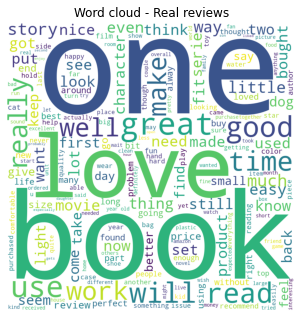

In [51]:
'''Next, lets do the same but split into using OR and CG reviews'''

# OR
accu = ""
stopwords = set(STOPWORDS)

for review in df.loc[df['label'] == 'OR'].text_:
    tokens = review.split()    #split sentence str into individual words
    
    for i in range (len(tokens)):      #lowercasing 
        tokens[i] = tokens[i].lower()
    accu += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stopwords,
                min_font_size = 10).generate(accu)
 
# plot the WordCloud image                      
plt.figure(figsize = (4, 4), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title("Word cloud - Real reviews")
 
plt.show()

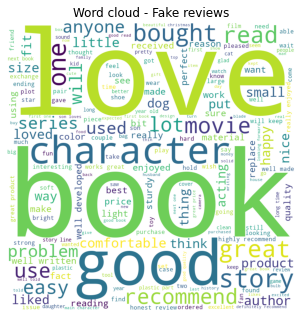

In [53]:
# CG
accu = ""
stopwords = set(STOPWORDS)

for review in df.loc[df['label'] == 'CG'].text_:
    tokens = review.split()    #split sentence str into individual words
    
    for i in range (len(tokens)):      #lowercasing 
        tokens[i] = tokens[i].lower()
    accu += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stopwords,
                min_font_size = 10).generate(accu)
 
# plot the WordCloud image                      
plt.figure(figsize = (4, 4), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title("Word cloud - Fake reviews")
 
plt.show()

### It is unclear if there is any difference. I will filter only the "Electronics" products and see the word clouds for OR and CG reviews. 

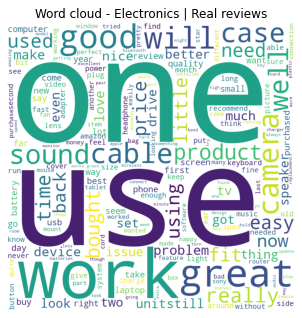

In [65]:
# Electronics - OR
accu = ""
stopwords = set(STOPWORDS)

for review in df.loc[(df['category'] == 'Electronics_5')].loc[(df['label'] == 'OR')].text_:
    tokens = review.split()    #split sentence str into individual words
    
    for i in range (len(tokens)):      #lowercasing 
        tokens[i] = tokens[i].lower()
    accu += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stopwords,
                min_font_size = 10).generate(accu)
 
# plot the WordCloud image                      
plt.figure(figsize = (4, 4), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title("Word cloud - Electronics | Real reviews")
 
plt.show()

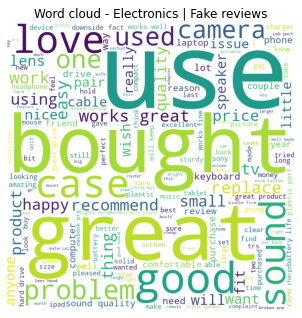

In [66]:
# Electronics - CG
accu = ""
stopwords = set(STOPWORDS)

for review in df.loc[(df['category'] == 'Electronics_5')].loc[(df['label'] == 'CG')].text_:
    tokens = review.split()    #split sentence str into individual words
    
    for i in range (len(tokens)):      #lowercasing 
        tokens[i] = tokens[i].lower()
    accu += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stopwords,
                min_font_size = 10).generate(accu)
 
# plot the WordCloud image                      
plt.figure(figsize = (4, 4), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title("Word cloud - Electronics | Fake reviews")
 
plt.show()

### A little more exploration wtih tf-idf << (some memory problem on my machine)

**This is just getting us started with tf-idf. We may want to split among product categories for credibility detection.**


Inspired by https://towardsdatascience.com/natural-language-processing-feature-engineering-using-tf-idf-e8b9d00e7e76

In [26]:
vectorizer = TfidfVectorizer(stop_words='english')
features = vectorizer.fit_transform(df.text_)

feature_names = vectorizer.get_feature_names()
dense = features.todense()
denselist = dense.tolist()
df_tfidf = pd.DataFrame(denslist, columns = feature_names)

MemoryError: 